&nbsp;

# 06 - Distribution statistique

---

&nbsp;

> ### Quelle est la structure statistique des anomalies ?

Après avoir validé la définition et la stationnarité approximative des anomalies de température de surface de la mer, ce notebook vise à caractériser leur structure statistique. L’objectif est d’analyser la forme de la distribution des anomalies, en particulier leur symétrie, la présence éventuelle de queues lourdes ou d’asymétries, ainsi que leur proximité avec une loi normale.

&nbsp;

---

&nbsp;

## 1. Histogrammes

### 1.2 Lecture générale


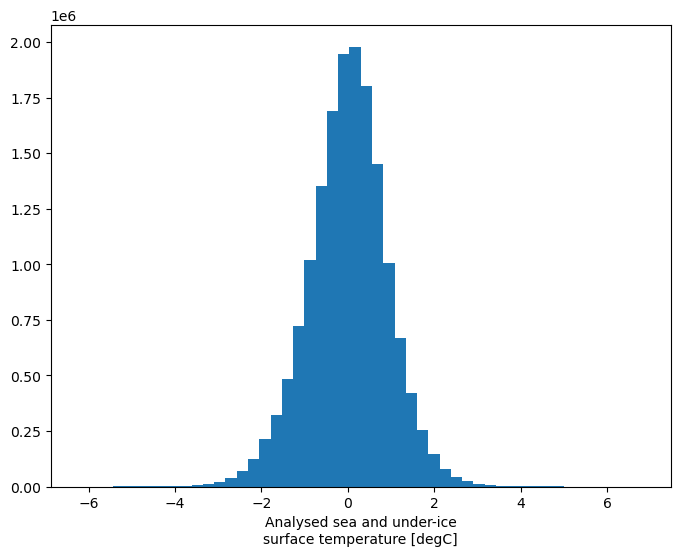

In [8]:
import xarray as xr

ds = xr.open_dataset("data/processed/sstDeseasonalizedCOPERNICUS20102019.nc")

# First visualization of the distribution of SST anomalies

ds.analysed_sst.plot.hist(bins=50, figsize=(8, 6));

À l'oeil, on observe une distribution en forme de cloche, un seul pic dominant centré proche de 0 et une légère extension des queues. À priori, on ne remarque de multimodalité évidente, ni d'asymétrie forte et les queues peuvent être possiblement un peu lourdes.
Avec la KDE (sur les données lissées), on remarque plus aisément la légère asymétrie de la distribution (amortissement plus faible côté négatif).

&nbsp;

> ### Est-ce la forme attendue pour des anomalies de SST désaisonnalisées ?

D'une part, les anomalies désignent les fluctuations autour d'un état moyen ($SST' = SST - \bar{SST}$) et donc la plupart du temps le système est proche de son état moyen, les écart sont modérés et les évènements extrêmes sont rares.

D'autre part, la SST est influencée par un ensemble de processus indépendants :
- flux air-mer
- vents
- courants
- marées (en zone côtière)

La somme de ces nombreux processus produit le plus souvent une distribution proche d'une gaussienne mais pas parfaitement.

Globalement, c'est la forme attendue d'un contexte océanographie, une quasi-gaussienne avec une seule mode pour la dynamique dominante dont l'imperfection peut se justifier par des épisodes météorologiques extrêmes, des dynamiques côtières ou une hétérogénéité spatiale prononcée (au vu de la dualité forte côte vs large de la zone sélectionnée).

<Axes: ylabel='Density'>

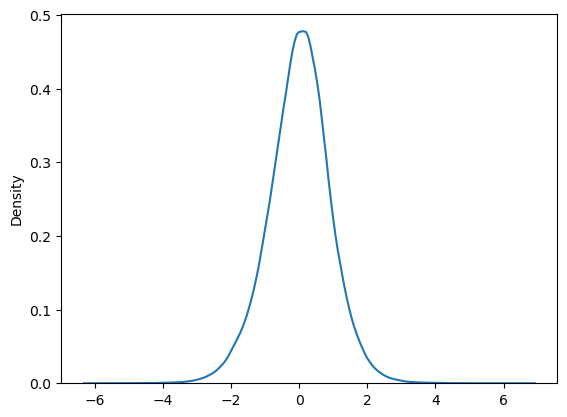

In [5]:
import seaborn as sns

sns.kdeplot(ds.analysed_sst.values.flatten(), bw_adjust=1.0);
